# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pathlib

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution
df = pd.read_csv(f"{str(pathlib.Path().resolve())[:-1]}1\\lab1.csv", index_col=0)
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [3]:
#solution
df["Grade"] = pd.cut(df["MathScore"], [0, 49, 62, 74, 87, 100], labels = [1,2,3,4,5], include_lowest=True) # izdvoji u skupine koristeci granice (desno ukljucene) i nazive dane u argumentima funkcije
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,Grade
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,3
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,3
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,4
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,1
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0,2
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0,2
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0,2
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0,4


In [4]:
tgt_cols = ["MathScore", "ReadingScore", "WritingScore", "Grade"]

3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [5]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
cols = []
for i in df.describe().columns: # choose only numerical columns
    if not(i in tgt_cols): # exclude target columns 
        cols.append(i)
X = df[cols]
y = df["Grade"]

In [6]:
y.isna().sum()

0

In [7]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

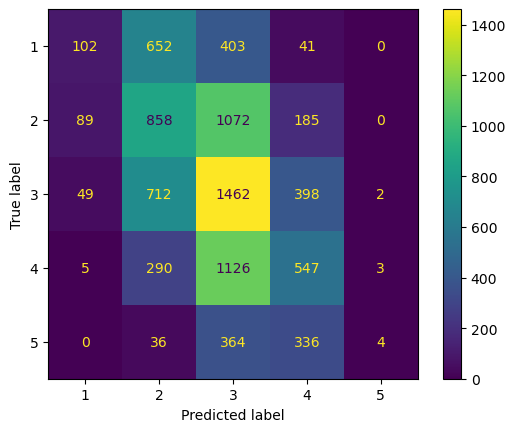

In [8]:
#Random Forest model
md = RandomForestClassifier(n_estimators=20, max_depth=5)
md.fit(X_train, y_train)
y_pred = md.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[1,2,3,4,5]).plot()

In [9]:
print(str(classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           1       0.42      0.09      0.14      1198
           2       0.34      0.39      0.36      2204
           3       0.33      0.56      0.41      2623
           4       0.36      0.28      0.31      1971
           5       0.44      0.01      0.01       740

    accuracy                           0.34      8736
   macro avg       0.38      0.26      0.25      8736
weighted avg       0.36      0.34      0.31      8736



5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [10]:
#transform grades into failed (0) or passed (1)
passed = lambda x: 1 if x>1 else 0
df["Passed"] = df["Grade"].apply(passed)
tgt_cols.append("Passed")
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,Grade,Passed
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0,3,1
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0,3,1
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0,4,1
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0,1,0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0,2,1
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0,2,1
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0,2,1
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0,4,1


In [11]:
#Random Forest model
cols = []
for i in df.describe().columns:
    if not(i in tgt_cols):
        cols.append(i)
X = df[cols]
y = df["Passed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)


In [12]:
md = RandomForestClassifier(n_estimators=20, max_depth=5)
md.fit(X_train, y_train)
y_pred = md.predict(X_test)

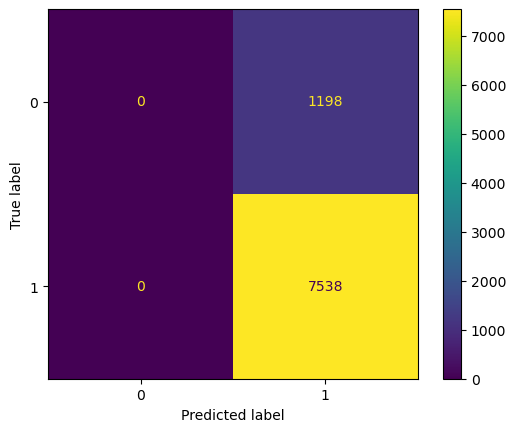

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [14]:
print(str(classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1198
           1       0.86      1.00      0.93      7538

    accuracy                           0.86      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.74      0.86      0.80      8736



c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Luka\anaconda3\envs\lab1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

In the second case where the model predicted whether a student has passed or failed, the model was more successful (86 % overall accuracy). However, that is so because the model classified all students into the "passed" bin, which gave no insight whatsoever. The first model, on the other hand, predicted 34 % of the student's grades, which is a much more meaningful prediction, though not very successful. By looking at the confusion matrix of the first model, one can observe that if the predicted grade didn't match the true grade, it was off by $\pm 1$, which may be acceptable in some cases.

The problem with the second model is in the indiversity of the data. Most students passed their math test, which makes it difficult to construe a model that successfully predicts which students exactly will fail. Due to the imbalance in the input data, we can adjust weights of the respective categories (passed or failed) or we can sample the data with a greater tendency to choose the less frequent category.

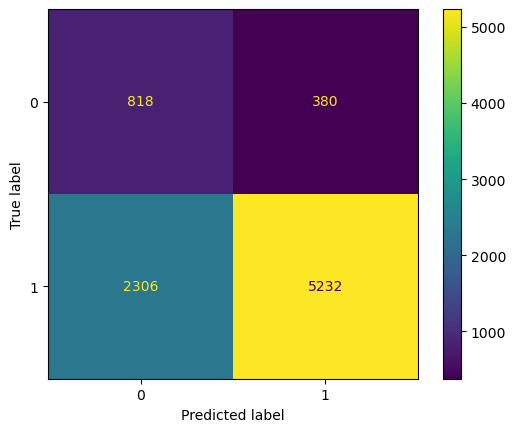

In [15]:
md = RandomForestClassifier(n_estimators=20, max_depth=5, class_weight={0:7, 1:1}) # adjust the weight of the "failed" category
md.fit(X_train, y_train)
y_pred = md.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

Anyways, too much of the false negative classifications emerge when trying to predict which students failed, thus the solution may be to seek another classifying algorithm.